# 0 Preamble

## <span style="color: red;">0.0 Initialize Environment</span>
<span style="color: red;">Start Warning</span>

Run the following only if you need to **initialize** source data for the entire project environment.

In [ ]:
%run grabSource.py

Run the following only if you need to **overwrite** source data for the entire project environment.

In [ ]:
%run grabSource.py overwrite

<span style="color: red;">End Warning</span>

## 0.1 Global Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

## 0.2 Local Packages

In [2]:
from ingestRaw import *
from transformClean import *
from segmentData import congressPresidentParty
from segmentFunctions import *

## 0.3 Import Data

In [3]:
congressVotes_raw = ingestCongressVote()

# 1 Data Mining

## 1.1 Verify Data Types

In [4]:
congressVotes_raw.dtypes

congress                            Int64
chamber                            object
rollnumber                          Int64
date                       datetime64[ns]
session                             Int64
clerk_rollnumber                    Int64
yea_count                           Int64
nay_count                           Int64
nominate_mid_1                    float64
nominate_mid_2                    float64
nominate_spread_1                 float64
nominate_spread_2                 float64
nominate_log_likelihood           float64
bill_number                        object
vote_result                        object
vote_desc                          object
vote_question                      object
dtl_desc                           object
dtype: object

## 1.2 Initial Distributions

In [5]:
congressVotes_raw.describe(include= 'all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
congress,111753.0,<NA>,<NA>,<NA>,73.920467,1.0,41.0,87.0,104.0,118.0,33.753132
chamber,111753,2,House,59125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rollnumber,111753.0,<NA>,<NA>,<NA>,368.390665,1.0,122.0,281.0,529.0,1865.0,317.955621
date,111753,NaN,NaN,NaN,1936-01-13 13:05:30.997825792,1789-05-16 00:00:00,1870-06-28 00:00:00,1962-09-18 00:00:00,1995-09-19 00:00:00,2024-08-01 00:00:00,NaN
session,33447.0,<NA>,<NA>,<NA>,1.437139,1.0,1.0,1.0,2.0,2.0,0.49604
clerk_rollnumber,33447.0,<NA>,<NA>,<NA>,279.685622,1.0,119.0,239.0,399.0,1186.0,206.30976
yea_count,111753.0,<NA>,<NA>,<NA>,123.063506,0.0,34.0,77.0,193.0,433.0,115.17146
nay_count,111753.0,<NA>,<NA>,<NA>,75.268816,0.0,20.0,44.0,105.0,427.0,78.559152
nominate_mid_1,111753.0,NaN,NaN,NaN,0.003677,-1.0,-0.166,0.0,0.179,1.0,0.337818
nominate_mid_2,111753.0,NaN,NaN,NaN,0.011355,-1.0,-0.262,0.0,0.304,1.0,0.534716


## 1.3 Preliminary Filtering

Voting outcomes are freeform text entry and have changed over time from the reporting source. Results for this analysis reduce the `Vote Result` to clear Pass/Fail markers. These markers are only used in recent years, beginning at Congress Number 101 (1989). This reduction produces sufficient results to conduct reasonable analysis without any claims to the utility of older data.

In [6]:
resultInclude = ['Passed', 'Failed']
congressVotes_clean = congressVotes_raw.query(
    f"vote_result in {resultInclude}"
)
congressVotes_clean = congressVotes_clean.drop(
    columns= [
        'session',
        'rollnumber',
        'clerk_rollnumber',
        'vote_question',
        'vote_desc',
        'dtl_desc'
    ]
)

## 1.4 Appending Segments

In [7]:
congressVotes_clean = pd.merge(
    congressVotes_clean,
    pd.DataFrame(congressPresidentParty, columns= ['congress', 'president_party']),
    how= 'left',
    on= 'congress'
)

## 1.5 Final Distributions

In [8]:
congressVotes_clean.describe(include= 'all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
congress,18849.0,<NA>,<NA>,<NA>,109.857181,101.0,106.0,110.0,114.0,118.0,4.701892
chamber,18849,1,House,18849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,18849,NaN,NaN,NaN,2007-08-28 17:15:15.040585472,1990-01-24 00:00:00,1999-11-04 00:00:00,2007-12-11 00:00:00,2015-03-25 00:00:00,2024-07-25 00:00:00,NaN
yea_count,18849.0,<NA>,<NA>,<NA>,260.250464,0.0,188.0,231.0,371.0,432.0,102.666775
nay_count,18849.0,<NA>,<NA>,<NA>,153.634782,0.0,30.0,184.0,230.0,427.0,106.30447
nominate_mid_1,18849.0,NaN,NaN,NaN,0.015747,-1.0,-0.087,0.0,0.103,1.0,0.28361
nominate_mid_2,18849.0,NaN,NaN,NaN,0.051274,-1.0,-0.092,0.0,0.214,1.0,0.457245
nominate_spread_1,18849.0,NaN,NaN,NaN,0.008296,-1.85,-0.228,0.0,0.239,1.757,0.416068
nominate_spread_2,18849.0,NaN,NaN,NaN,-0.001108,-6.046,-0.174,0.0,0.196,3.486,0.484605
nominate_log_likelihood,18849.0,NaN,NaN,NaN,-57.191051,-303.886,-93.333,-36.925,-0.381,0.0,62.952758


# 2 Distribution Analysis

## 2.1 Testing Normality

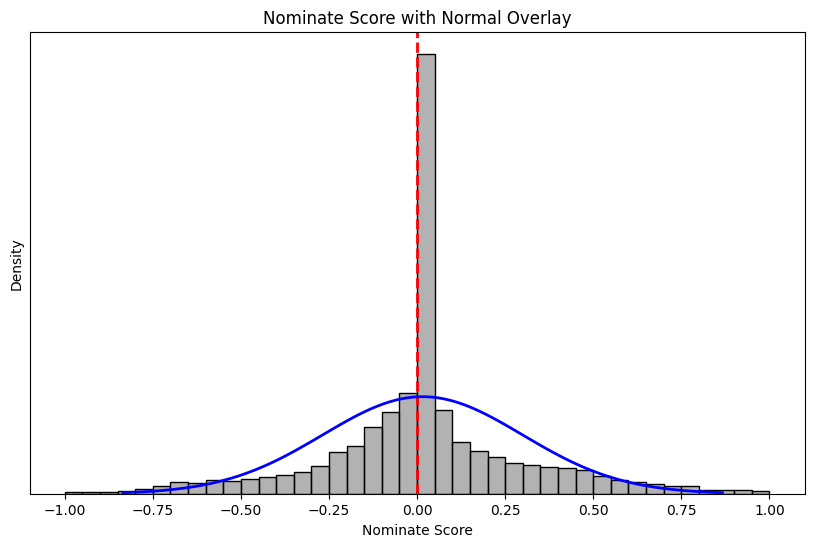

In [9]:
sample = congressVotes_clean['nominate_mid_1'].tolist()
s_mean = np.mean(sample)
s_mid = np.median(sample)
s_dev = np.std(sample)
plt.figure(figsize=(10, 6))
sns.histplot(sample, bins=40, kde=False, color='gray', alpha=0.6, stat= 'density')
plt.axvline(s_mid, color='red', linestyle='dashed', linewidth= 2)
x = np.linspace(s_mean - 3*s_dev, s_mean + 3*s_dev, 100)
pdf = stats.norm.pdf(x, s_mean, s_dev)
plt.plot(x, pdf, color='blue', linestyle='solid', linewidth= 2)
plt.yticks([])
plt.xlabel('Nominate Score')
plt.title('Nominate Score with Normal Overlay')
plt.show()

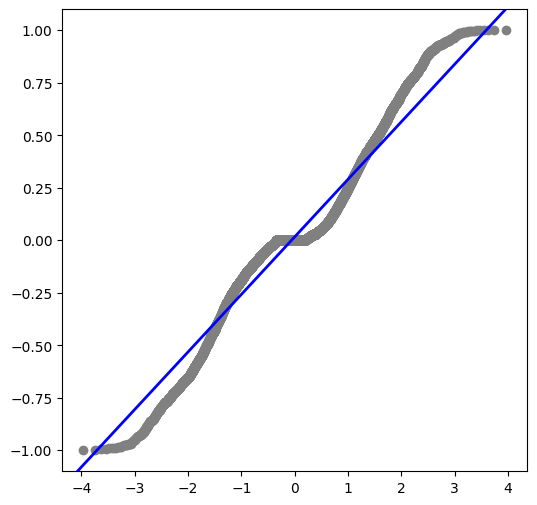

In [10]:
res = stats.probplot(congressVotes_clean['nominate_mid_1'], dist= 'norm')
q_theoretic, q_sample = res[0][0], res[0][1]
slope, intercept = res[1][0], res[1][1]
se = stats.sem(q_theoretic)
upper_CI = q_theoretic*slope + intercept + 1.96 * se
lower_CI = q_theoretic*slope + intercept - 1.96 * se
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(q_theoretic, q_sample, 'o', color='gray')
ax.axline(
    (0, intercept),
    slope= slope,
    color= 'blue',
    lw= 2
)
plt.show()

Visual inspection of the data shows a modicum normality in its distribution. However, given the large size of the population data, the *visually* minor deviations from normality break the necessary assumptions of the population being a normal distribution for the purposes of statistical metrics.

Additionally, because of the dataset size, formal statistical tests of significance with normality are an inappropriate and inviable measure of determinance because the observation count overpowers the testing power of the statistic. Bootstrapping the test mitigates some of this issue even though the results (below) futher confirm the non-normality of the population.

In [11]:
testsNormality = pd.DataFrame()
for i in range(100):
    stats.shapiro(congressVotes_clean['nominate_mid_1'].sample(1000))
    _tests = congressVotes_clean.groupby('congress').apply(lambda x: stats.shapiro(x['nominate_mid_1']), include_groups= False)
    testsNormality[i] = _tests.apply(lambda x: round(x[1], 4))
x = len(testsNormality[(testsNormality > 0).any(axis= 1)])
f"Number of non-zero probability results in 100 bootstrapped tests: {x}"

'Number of non-zero probability results in 100 bootstrapped tests: 0'

## 2.2 Grouping Considerations

An assumptive expectation of this report is the Congressional Sessions are functionally different from each other or progressively deviate over time and Presidential terms. Changes in Congress would manifest on the nominate spectrum (Liberal v Conservative) through changes in measures of central tendency and variability.

### 2.2(a) Moments of Mean

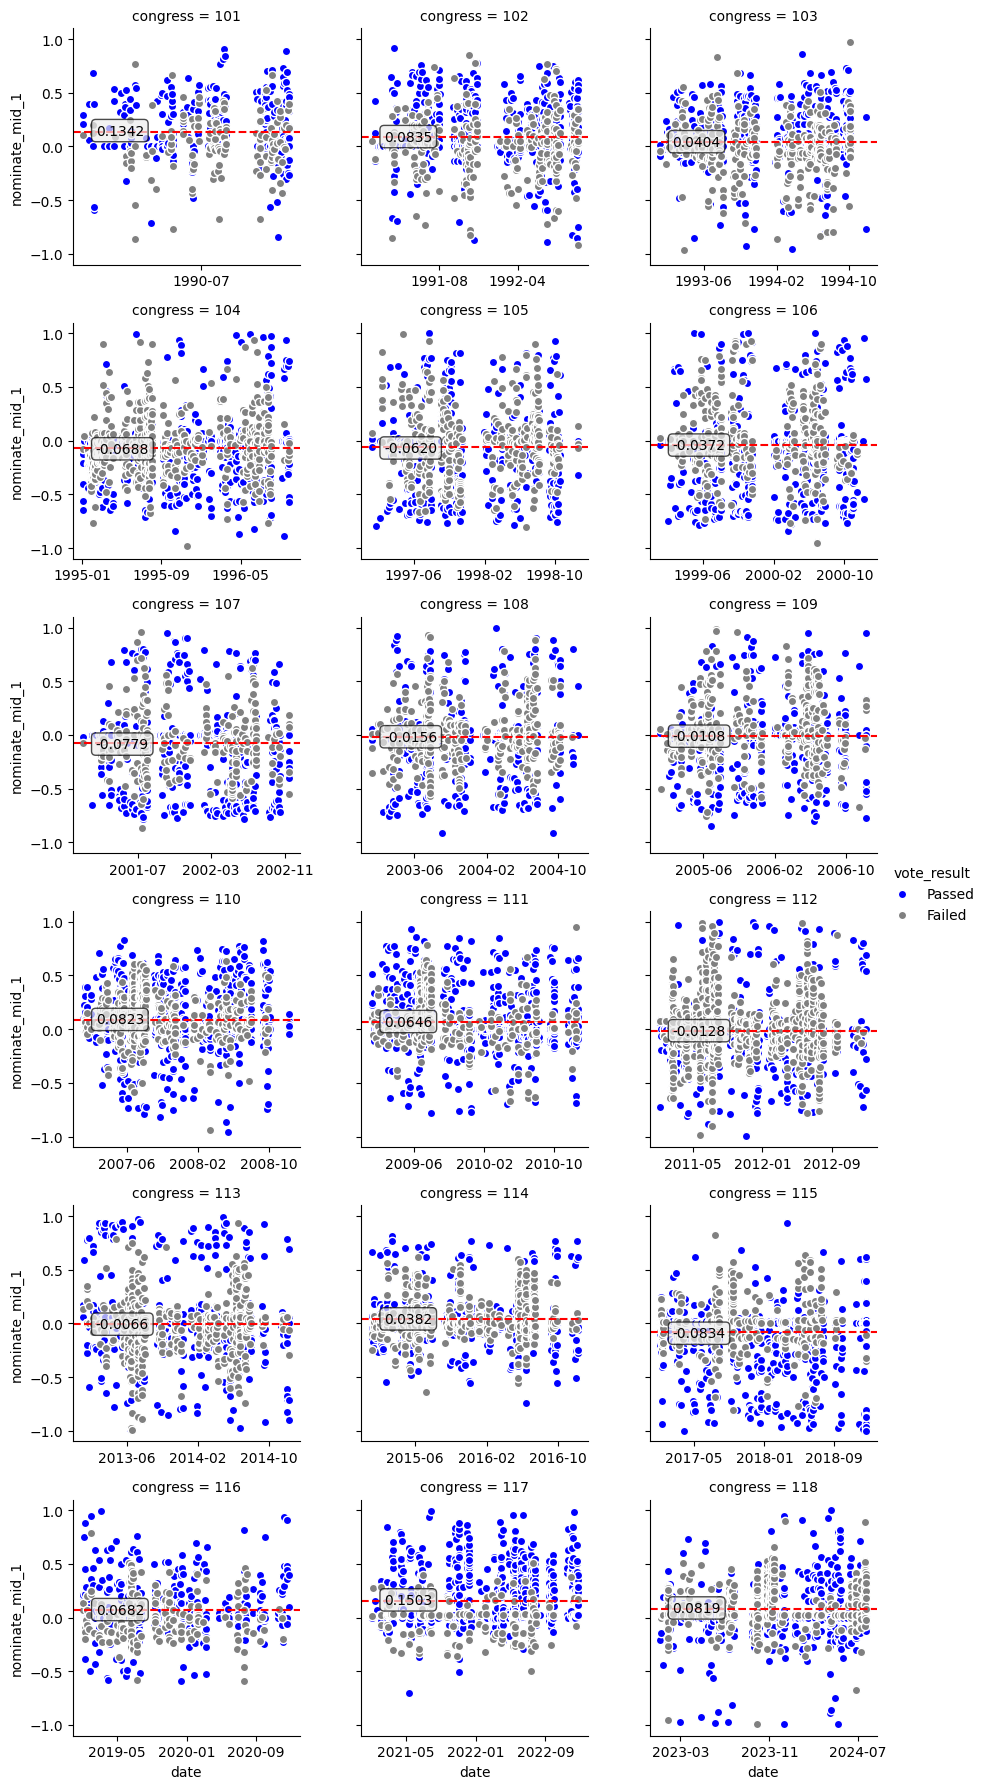

In [12]:
g = sns.FacetGrid(
    congressVotes_clean,
    sharex= False,
    col_wrap= 3,
    col= 'congress',
    hue= 'vote_result',
    palette= {
        'Passed': 'blue',
        'Failed': 'gray'
    }
) 
g.map(plt.scatter, 'date', 'nominate_mid_1', edgecolor= "w").add_legend()
for ax, (group_name, group_data) in zip(g.axes.flat, congressVotes_clean.groupby('congress')):
    mean_nominate = group_data['nominate_mid_1'].mean()
    ax.axhline(mean_nominate, color= 'red', linestyle= 'dashed')
    ax.text(
        x= .1, y= (mean_nominate + 1)/2,
        s= f"{mean_nominate:.4f}",
        transform= ax.transAxes,
        va= 'center',
        bbox= dict(boxstyle= "round", fc= "#ededed", alpha= .7)
    )
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval= 8))
plt.show()

In [13]:
subsetPass = congressVotes_clean[congressVotes_clean['vote_result'] == 'Passed']
df1 = testMannWhitney(
    congressVotes_clean,
    'congress',
    'nominate_mid_1',
    alternative= 'two-sided'
).rename(columns= {"P-Value": "P-Value FULL"}).drop(columns= "U-Statistic").set_index(['congress_1', 'congress_2'])
df2 = testMannWhitney(
    congressVotes_clean[congressVotes_clean['vote_result'] == 'Passed'],
    'congress',
    'nominate_mid_1',
    alternative= 'two-sided'
).rename(columns= {"P-Value": "P-Value PASS"}).drop(columns= "U-Statistic").set_index(['congress_1', 'congress_2'])

statsMannWhitney = df1.join(
    df2, how= 'outer')
statsMannWhitney[(statsMannWhitney > .05).any(axis= 1)].round(4)


P-Value FULL  P-Value PASS
congress_1 congress_2                            
101        117               0.8038        0.4316
102        110               0.2069        0.0000
           118               0.8440        0.0000
103        111               0.9986        0.0000
           116               0.1003        0.6549
104        105               0.1095        0.1688
           106               0.0006        0.1163
           107               0.2226        0.0276
           112               0.0000        0.7804
105        106               0.2078        0.9568
           107               0.4377        0.5012
           112               0.0099        0.1641
           115               0.0859        0.1064
106        107               0.0668        0.4338
           112               0.4338        0.0716
           115               0.3801        0.0264
107        115               0.0016        0.1271
108        109               0.3072        0.6265
           113               0.9787        0.3892
109        113               0.4101        0.4938
110        116               0.2706        0.0007
           118               0.0639        0.0920
111        118               0.0000        0.2023
112        113               0.1133        0.0000
           115               0.3117        0.0010
113        114               0.0000        0.1271
116        118               0.0516        0.0000

The nominate mean scores for each Congress are very near zero and have minimal fluctuation, suggesting the distributions (about the mean) of the entire dataset do not vary much at the subsetting of each Congressional Session. While there were instances of every Congress failing to reject the Null of the MannWhitney test, it's notable the pattern is inconsistent when accounting for expected similarities of adjacent Sessions or similar party compositions.

### 2.2(b) Moments of Variance

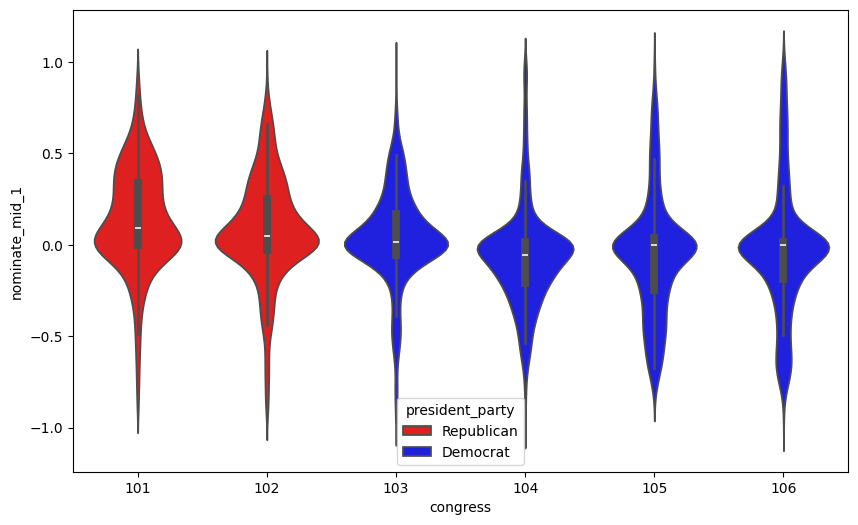

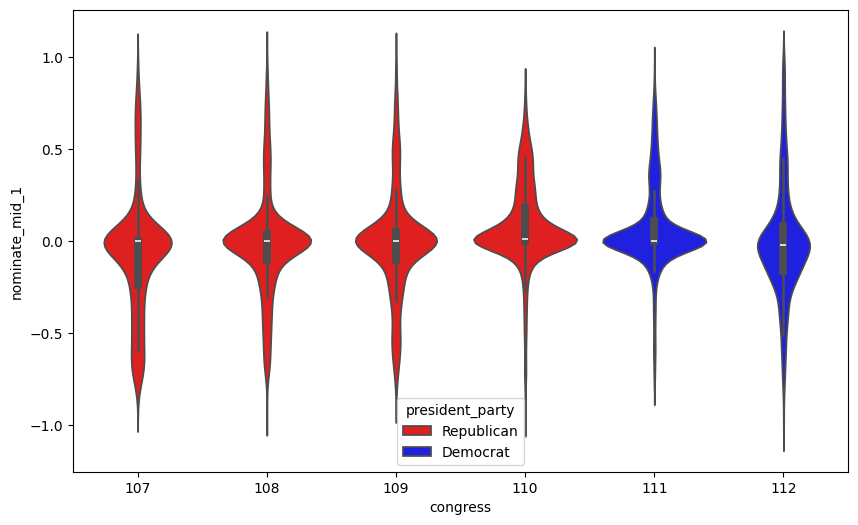

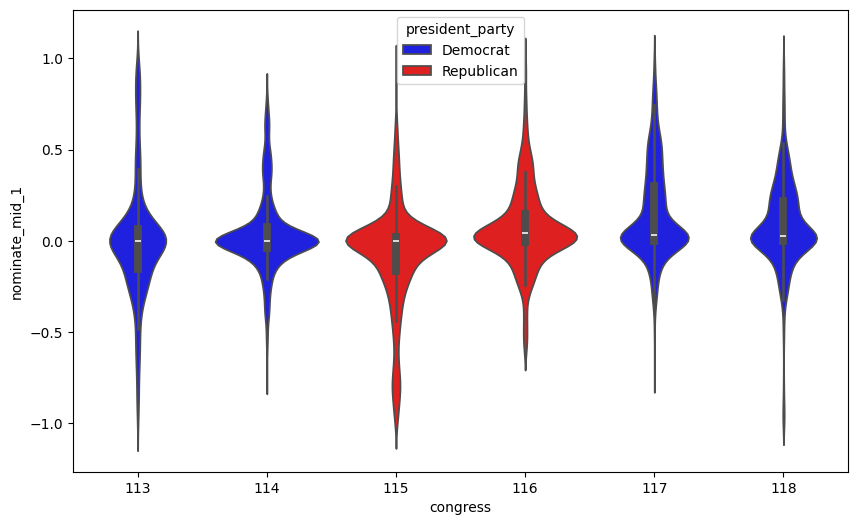

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    congressVotes_clean[congressVotes_clean['congress'].between(101, 106)],
    x= 'congress', y= 'nominate_mid_1', hue= 'president_party',
    palette={'Republican': 'red', 'Democrat': 'blue'})
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(
    congressVotes_clean[congressVotes_clean['congress'].between(107, 112)],
    x= 'congress', y= 'nominate_mid_1', hue= 'president_party',
    palette={'Republican': 'red', 'Democrat': 'blue'})
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(
    congressVotes_clean[congressVotes_clean['congress'].between(113, 118)],
    x= 'congress', y= 'nominate_mid_1', hue= 'president_party',
    palette={'Republican': 'red', 'Democrat': 'blue'})
plt.show()

Unlike the evaluation of the mean with each Congress, the variance of nominate scores in each Congress are not alike and have a large deviation from their adjacent session numbers; identifying the Presidential party by color futher suggests there is no similarity by the controlling political direction. This shows that (adjacent) time and Presidential term have no influence over maintaining a homogeneous Congressional body.

In [15]:
statsFlignerKilleen = testFlignerKilleen(
    congressVotes_clean,
    'congress',
    'nominate_mid_1'
).set_index(['congress_1', 'congress_2'])
statsFlignerKilleen[statsFlignerKilleen['P-Value'] > 0.05]

F-Statistic   P-Value
congress_1 congress_2                       
101        102            2.951981  0.085772
           105            0.000253  0.987301
           106            1.207169  0.271894
           112            3.446848  0.063373
102        104            2.077593  0.149476
           105            1.429748  0.231806
           106            0.008113  0.928230
           107            2.095153  0.147767
           112            0.043467  0.834848
           113            1.135791  0.286543
103        107            0.537586  0.463435
           113            3.365391  0.066580
           117            0.013017  0.909164
           118            2.234465  0.134963
104        106            0.834449  0.360989
           107            0.405101  0.524467
           112            1.932455  0.164490
           113            0.000572  0.980925
105        106            3.273554  0.070405
           112            0.705325  0.401000
106        107            1.944735  0.163155
           112            0.464275  0.495633
           113            0.051944  0.819715
           117            3.483006  0.062002
107        113            2.323881  0.127402
           115            2.622761  0.105341
           117            0.098244  0.753948
           118            1.481963  0.223468
108        109            1.777416  0.182467
           110            1.156731  0.282144
           115            2.894726  0.088870
           116            1.203002  0.272723
109        110            0.997220  0.317984
           115            0.005993  0.938294
           116            0.244353  0.621080
           118            1.428072  0.232079
110        115            0.716279  0.397367
           116            0.550549  0.458094
           118            3.673943  0.055269
112        113            1.694659  0.192988
113        117            3.342221  0.067523
115        116            0.266338  0.605799
116        118            1.906856  0.167313
117        118            2.060120  0.151198

The only notable similarity between each Congress appears to be when the incumbent party retains it's control with subsequent Congressional Sessions; this is the only component to align with the initial assumptions made by this report. 